In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_NN_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0,NaN,40.0,35.0,168.0,43.1,NaN,33.0
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,NaN
764,2,122.0,70.0,27.0,0.0,36.8,NaN,27.0
765,5,121.0,72.0,23.0,112.0,26.2,NaN,30.0
766,1,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	76
float64		column 3	19
float64		column 4	38
float64		column 5	38
float64		column 6	38
float64		column 7	76
float64		column 8	19


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,768.000000,692.000000,749.000000,730.000000,730.000000,730.000000,692.000000,749.000000
mean,3.845052,120.274566,69.205607,20.452055,79.030137,31.990685,0.458621,33.170895
std,3.369578,30.596904,19.101696,15.717971,112.314138,7.779932,0.316598,11.600418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,100.000000,62.000000,0.000000,0.000000,27.400000,0.242500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,36.500000,32.000000,0.369000,29.000000
75%,6.000000,138.000000,80.000000,32.000000,125.750000,36.400000,0.600000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<AxesSubplot:>

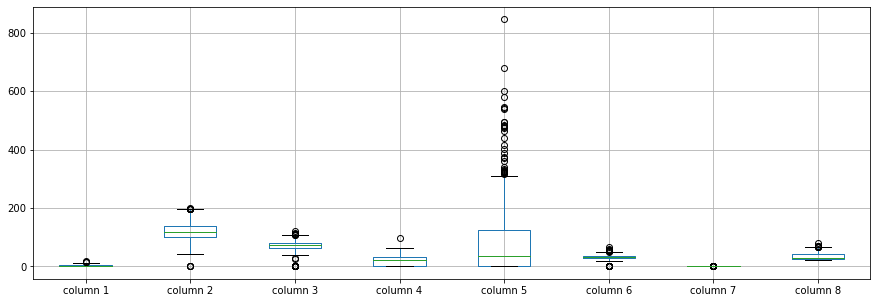

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.845052
column 2    120.274566
column 3     69.205607
column 4     20.452055
column 5     79.030137
column 6     31.990685
column 7      0.458621
column 8     33.170895
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.138731,0.133942,-0.094868,-0.073353,0.024970,-0.040995,0.543700
column 2,0.138731,1.000000,0.144094,0.063621,0.328020,0.219313,0.097603,0.280372
column 3,0.133942,0.144094,1.000000,0.183246,0.081085,0.289667,0.067125,0.261653
column 4,-0.094868,0.063621,0.183246,1.000000,0.430656,0.371387,0.189048,-0.115737
column 5,-0.073353,0.328020,0.081085,0.430656,1.000000,0.162184,0.144610,-0.042703
column 6,0.024970,0.219313,0.289667,0.371387,0.162184,1.000000,0.119524,0.051111
column 7,-0.040995,0.097603,0.067125,0.189048,0.144610,0.119524,1.000000,0.018008
column 8,0.543700,0.280372,0.261653,-0.115737,-0.042703,0.051111,0.018008,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+26,8+26+26,8+26+26+26,8+26+26+26+26,8+26+26+26+26+26,8+26+26+26+26+26+26,8+26+26+26+26+26,8+26+26+26+26,8+26+26+26,8+26+26,8+26,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 401.5010929107666
Epoch: 1 , loss: 400.39160283406574
Epoch: 2 , loss: 399.8315251668294
Epoch: 3 , loss: 399.7926788330078
Epoch: 4 , loss: 398.1914857228597
Epoch: 5 , loss: 395.81153233846027
Epoch: 6 , loss: 394.2129364013672
Epoch: 7 , loss: 391.05637613932294
Epoch: 8 , loss: 388.17955652872723
Epoch: 9 , loss: 382.22813351949054
Epoch: 10 , loss: 378.44865163167316
Epoch: 11 , loss: 368.651668548584
Epoch: 12 , loss: 368.3822422027588
Epoch: 13 , loss: 361.4387270609538
Epoch: 14 , loss: 353.80121421813965
Epoch: 15 , loss: 352.19753964742023
Epoch: 16 , loss: 343.8325964609782
Epoch: 17 , loss: 343.72230339050293
Epoch: 18 , loss: 338.911039352417
Epoch: 19 , loss: 333.14861488342285
Epoch: 20 , loss: 322.17076142628986
Epoch: 21 , loss: 317.8418140411377
Epoch: 22 , loss: 314.0514310201009
Epoch: 23 , loss: 308.7884174982707
Epoch: 24 , loss: 305.7912302017212
Epoch: 25 , loss: 310.975882530212

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
2,0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
3,0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
4,0,2.597748,0.0,0.0,0.000000,0.0,-1.413750,0.000000
...,...,...,...,...,...,...,...,...
763,0,0.000000,0.0,0.0,0.000000,0.0,0.000000,-62.530471
764,0,0.000000,0.0,0.0,0.000000,0.0,0.164747,0.000000
765,0,0.000000,0.0,0.0,0.000000,0.0,0.341077,0.000000
766,0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1345.0600170324738, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.23284727130584407

In [18]:
new_df.iloc[66,:]

column 1      0.000
column 2    109.000
column 3     88.000
column 4     30.000
column 5      0.000
column 6     32.500
column 7      0.855
column 8     38.000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6,148.000000,72.0,35.0,0.000000,33.6,0.627000,50.000000
1,1,85.000000,66.0,29.0,0.000000,26.6,0.351000,31.000000
2,8,183.000000,64.0,0.0,0.000000,23.3,0.672000,32.000000
3,1,89.000000,66.0,23.0,94.000000,28.1,0.167000,21.000000
4,0,139.597748,40.0,35.0,168.000000,43.1,0.874250,33.000000
...,...,...,...,...,...,...,...,...
763,10,101.000000,76.0,48.0,180.000000,32.9,0.171000,0.469529
764,2,122.000000,70.0,27.0,0.000000,36.8,0.504747,27.000000
765,5,121.000000,72.0,23.0,112.000000,26.2,0.586077,30.000000
766,1,126.000000,60.0,0.0,0.000000,30.1,0.349000,47.000000


In [20]:
imputations[-1].to_excel("PID_NN_5.xlsx", index=False, header=False)